<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



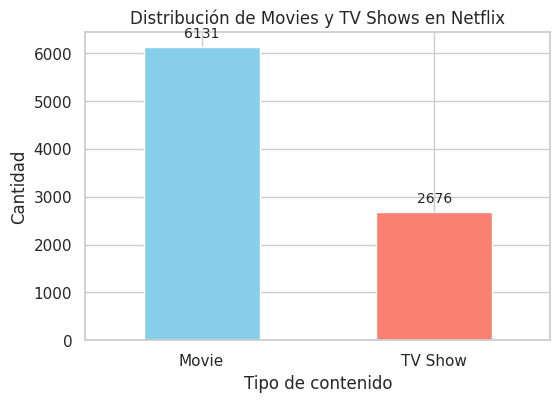

Porcentajes de cada tipo de contenido:
 type
Movie      69.615079
TV Show    30.384921
Name: count, dtype: float64


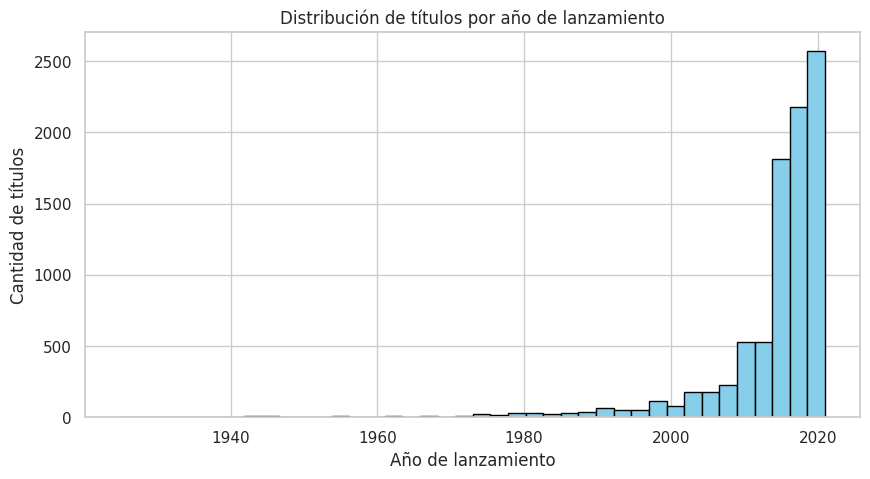

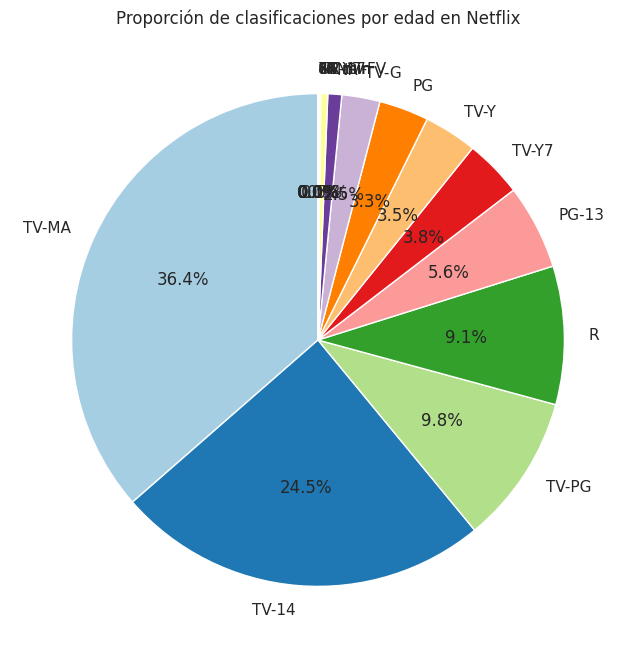

In [6]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conteo = df['type'].value_counts()

ax = conteo.plot(kind="bar", color=["skyblue", "salmon"], figsize=(6,4))

plt.title("Distribución de Movies y TV Shows en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)

for i, valor in enumerate(conteo.values):
    plt.text(i, valor + 200, str(valor), ha='center', fontsize=10)

plt.show()

porcentajes = (conteo / conteo.sum()) * 100
print("Porcentajes de cada tipo de contenido:\n", porcentajes)

# 2
ax = df['release_year'].plot(
    kind="hist",
    bins=40,
    color="skyblue",
    edgecolor="black",
    figsize=(10,5)
)

plt.title("Distribución de títulos por año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()

# 3

conteo_rating = df['rating'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    conteo_rating.values,
    labels=conteo_rating.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Proporción de clasificaciones por edad en Netflix")
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


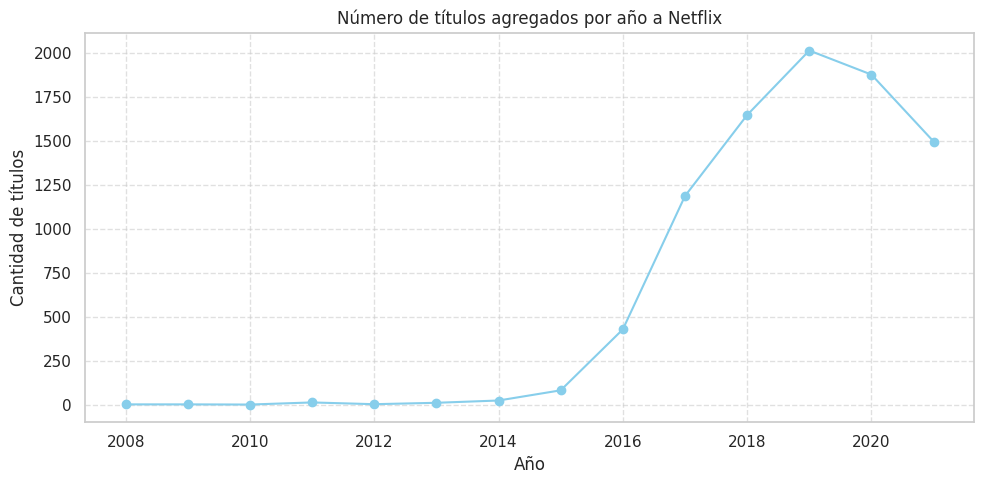

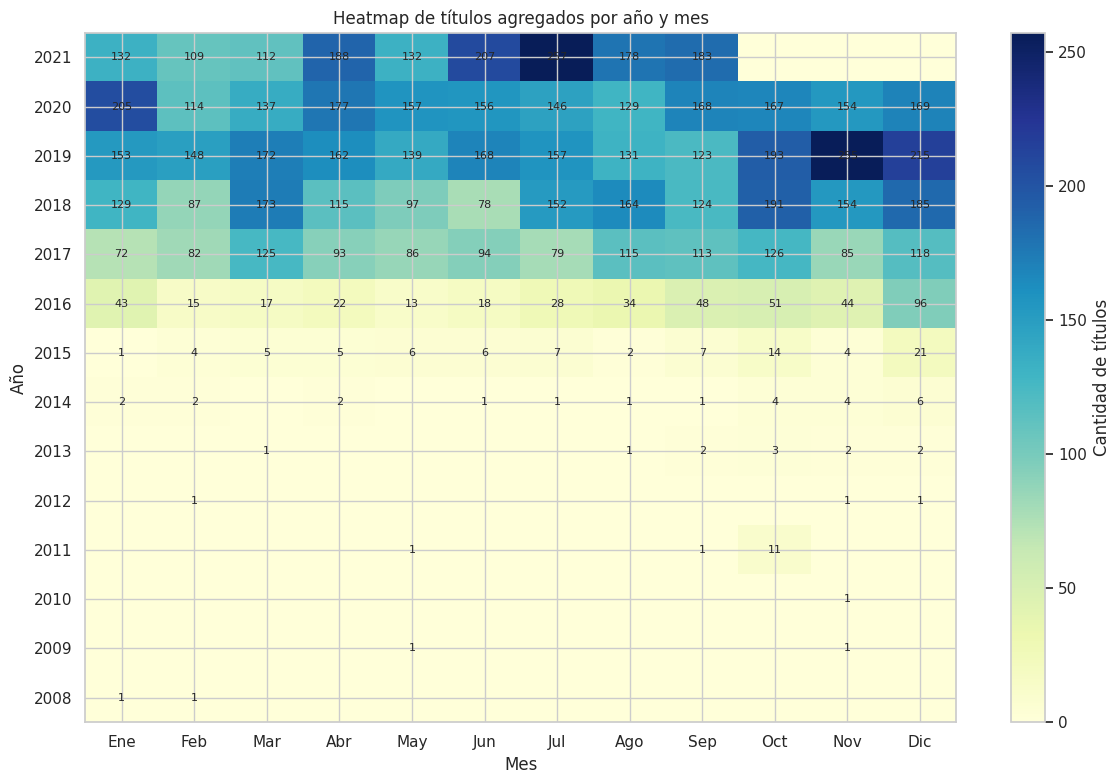

Estadísticas por género (ordenadas por mediana):
                          count   mean  median   std    q1     q3   IQR
main_genre                                                             
Classic Movies               80  114.8   112.0  40.7  94.0  130.2  36.2
Action & Adventure          859  113.5   108.0  25.1  96.0  126.0  30.0
Dramas                     1600  111.4   108.0  23.6  96.0  124.0  28.0
International Movies        128  108.1   107.0  25.3  92.0  123.5  31.5
Comedies                   1210  106.7   102.0  23.1  93.0  117.0  24.0
Thrillers                    65  100.0    97.0  15.4  89.0  107.0  18.0
Horror Movies               275   98.2    94.0  16.0  88.0  103.5  15.5
Documentaries               829   82.1    87.0  24.2  70.0   96.0  26.0
Children & Family Movies    605   78.4    86.0  26.1  66.0   95.0  29.0
Stand-Up Comedy             334   66.9    65.0  12.3  60.0   72.0  12.0
Movies                       54   45.5    44.0  21.6  25.2   58.0  32.8


/tmp/ipython-input-2155450301.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(boxplot_data, labels=order, patch_artist=True, showfliers=True)


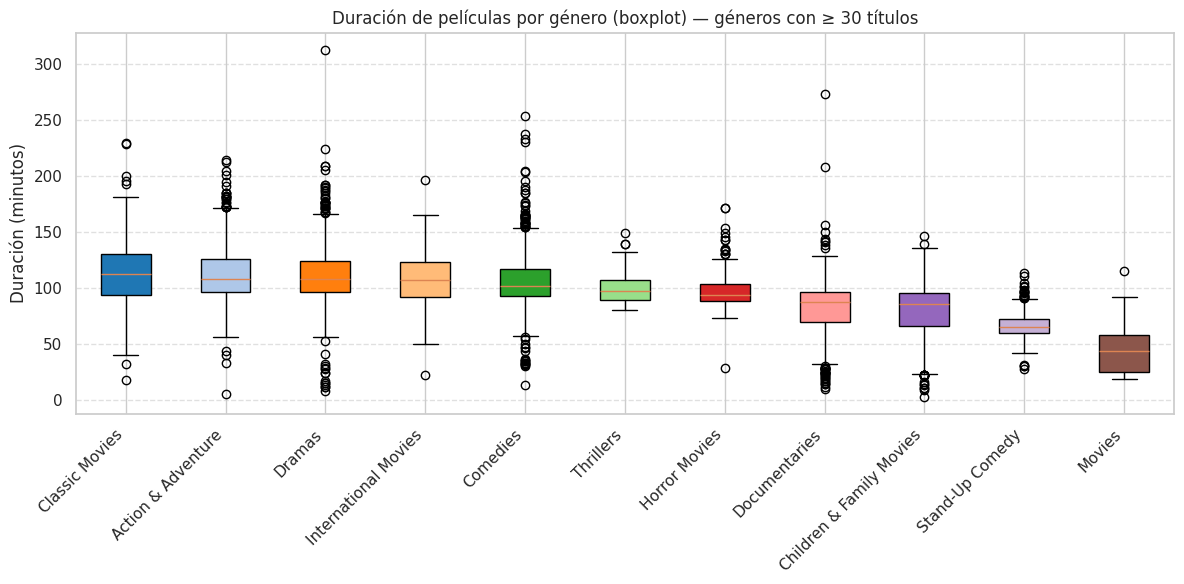

In [20]:
df['date_added'] = df['date_added'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
conteo_years = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
conteo_years.plot(kind="line", marker="o", color="skyblue")
plt.title("Número de títulos agregados por año a Netflix")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

hm_df = df.dropna(subset=['year_added', 'month_added'])

heatmap_data = hm_df.pivot_table(
    index='year_added',
    columns='month_added',
    values='show_id',
    aggfunc='count',
    fill_value=0
).sort_index()

fig, ax = plt.subplots(figsize=(12,8))
cax = ax.imshow(heatmap_data.values, aspect='auto', cmap='YlGnBu', origin='lower')

ax.set_title('Heatmap de títulos agregados por año y mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Año')

ax.set_xticks(np.arange(12))
ax.set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index.astype(int))

plt.colorbar(cax, label='Cantidad de títulos')
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        val = int(heatmap_data.values[i, j])
        if val != 0:
            ax.text(j, i, val, ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

df['main_genre'] = df['listed_in'].fillna('').apply(lambda x: x.split(',')[0].strip() if x != '' else np.nan)
is_movie = df['type'] == 'Movie'

def extract_minutes(x):
    if isinstance(x, str) and 'min' in x:
        import re
        m = re.search(r'(\d+)', x)
        if m:
            return int(m.group(1))
    return np.nan

df.loc[is_movie, 'duration_min'] = df.loc[is_movie, 'duration'].apply(extract_minutes)
movies = df[is_movie].copy()
movies = movies.dropna(subset=['duration_min', 'main_genre'])

min_count = 30
genre_counts = movies['main_genre'].value_counts()
selected_genres = genre_counts[genre_counts >= min_count].index.tolist()

movies_sel = movies[movies['main_genre'].isin(selected_genres)]

grouped = movies_sel.groupby('main_genre')['duration_min']
stats = grouped.agg([
    ('count','count'),
    ('mean','mean'),
    ('median','median'),
    ('std','std'),
    ('q1', lambda x: np.percentile(x,25)),
    ('q3', lambda x: np.percentile(x,75)),
    ('IQR', lambda x: np.percentile(x,75) - np.percentile(x,25))
]).sort_values('median', ascending=False)

print("Estadísticas por género (ordenadas por mediana):")
print(stats.round(1))
order = stats.sort_values('median', ascending=False).index.tolist()
boxplot_data = [movies_sel.loc[movies_sel['main_genre']==g, 'duration_min'].values for g in order]

plt.figure(figsize=(12,6))
bp = plt.boxplot(boxplot_data, labels=order, patch_artist=True, showfliers=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Duración (minutos)')
plt.title('Duración de películas por género (boxplot) — géneros con ≥ {} títulos'.format(min_count))
plt.grid(axis='y', linestyle='--', alpha=0.6)

colors = plt.cm.tab20.colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()




## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



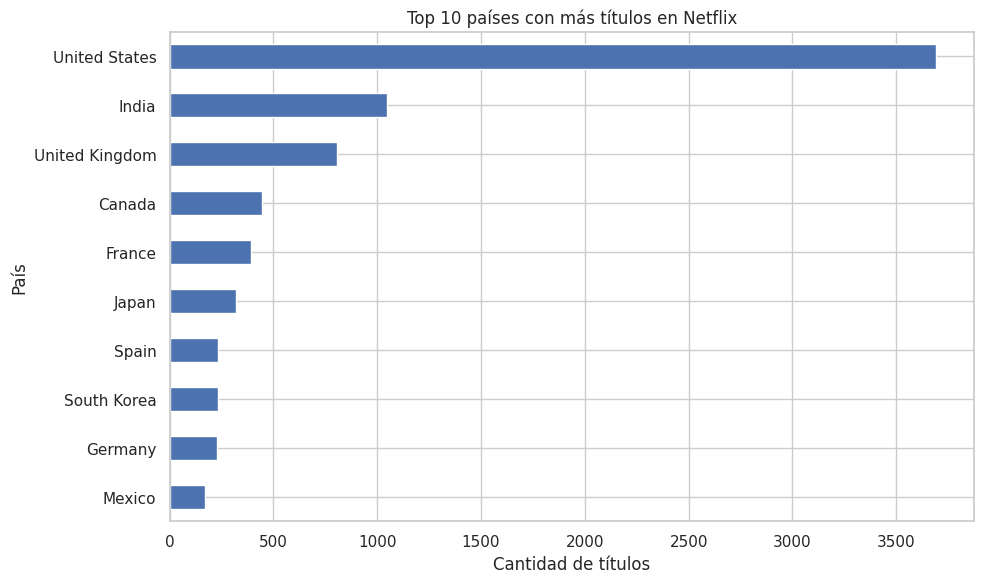

Top 10 países (cantidad):
country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


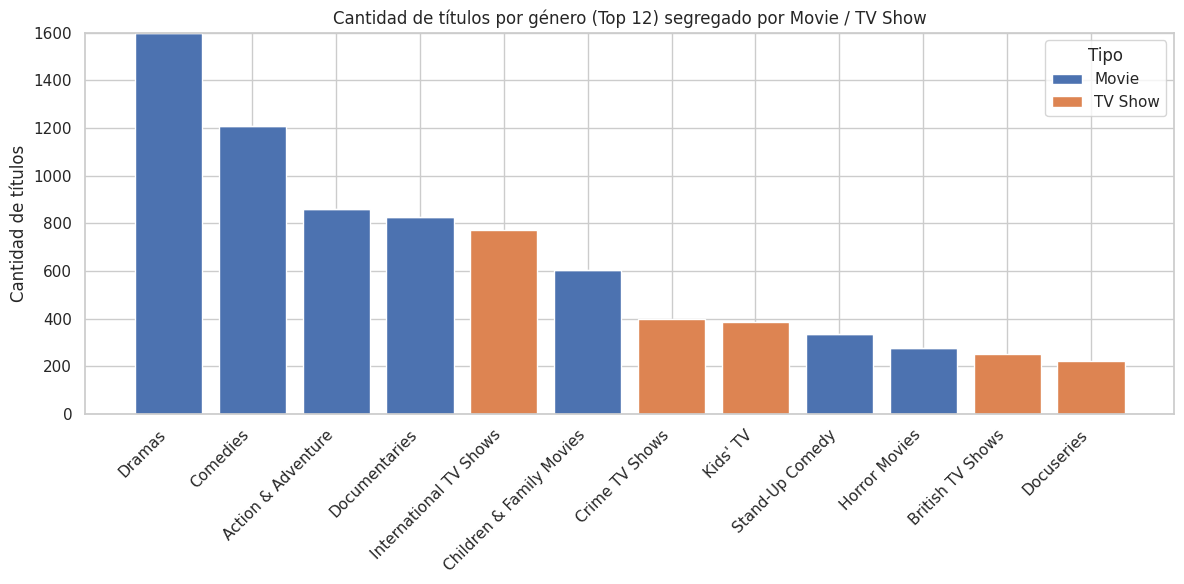


Top géneros (counts y proporciones Movie/TV):
type                      Movie  TV Show  total  prop_movie  prop_tv
main_genre                                                          
Dramas                     1600        0   1600         1.0      0.0
Comedies                   1210        0   1210         1.0      0.0
Action & Adventure          859        0    859         1.0      0.0
Documentaries               829        0    829         1.0      0.0
International TV Shows        0      774    774         0.0      1.0
Children & Family Movies    605        0    605         1.0      0.0
Crime TV Shows                0      399    399         0.0      1.0
Kids' TV                      0      388    388         0.0      1.0
Stand-Up Comedy             334        0    334         1.0      0.0
Horror Movies               275        0    275         1.0      0.0
British TV Shows              0      253    253         0.0      1.0
Docuseries                    0      221    221         

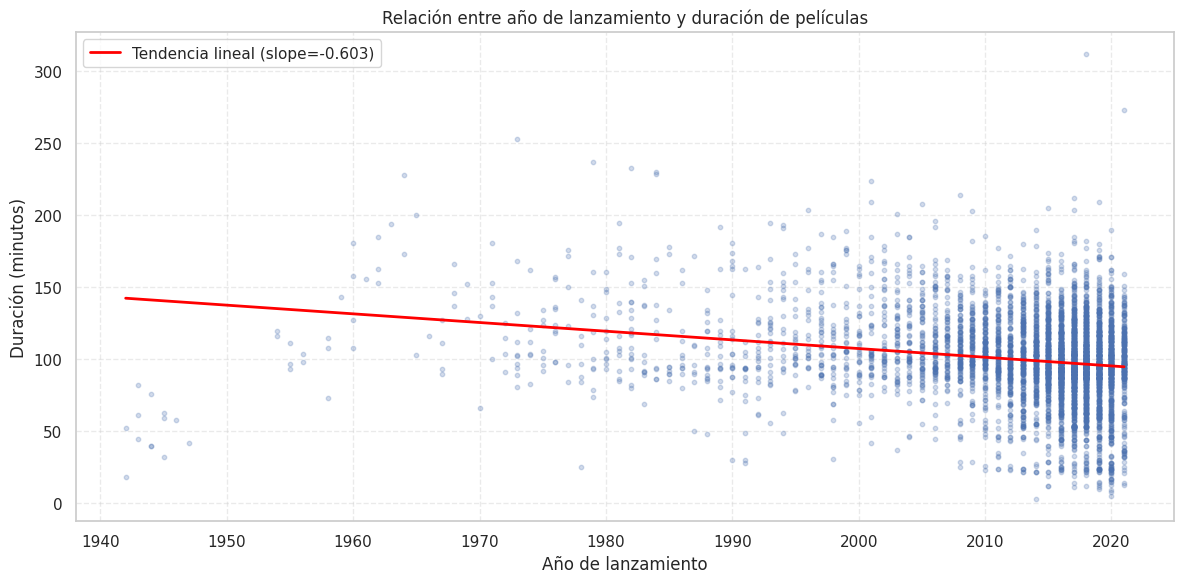


Top 10 películas más largas:
                      title  release_year  duration_min         main_genre
 Black Mirror: Bandersnatch          2018           312             Dramas
Headspace: Unwind Your Mind          2021           273      Documentaries
     The School of Mischief          1973           253           Comedies
             No Longer kids          1979           237           Comedies
         Lock Your Girls In          1982           233           Comedies
            Raya and Sakina          1984           230           Comedies
Once Upon a Time in America          1984           229     Classic Movies
                     Sangam          1964           228     Classic Movies
                     Lagaan          2001           224             Dramas
               Jodhaa Akbar          2008           214 Action & Adventure


In [21]:
def extract_minutes(x):
    """Extrae minutos de strings como '90 min'. Devuelve np.nan si no aplica."""
    if isinstance(x, str) and 'min' in x:
        import re
        m = re.search(r'(\d+)', x)
        if m:
            return int(m.group(1))
    return np.nan
df['country'] = df['country'].where(df['country'].notna(), None)
df['listed_in'] = df['listed_in'].where(df['listed_in'].notna(), None)
countries = df[['show_id','country']].dropna(subset=['country']).copy()
countries['country'] = countries['country'].astype(str).apply(lambda s: [c.strip() for c in s.split(',')])
countries = countries.explode('country')
top_countries = countries['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.sort_values().plot(kind='barh')
plt.title('Top 10 países con más títulos en Netflix')
plt.xlabel('Cantidad de títulos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

print("Top 10 países (cantidad):")
print(top_countries)

df['main_genre'] = df['listed_in'].fillna('').apply(lambda x: x.split(',')[0].strip() if x else np.nan)

genre_type = df.dropna(subset=['main_genre']).groupby(['main_genre','type'])['show_id'].count().unstack(fill_value=0)

genre_type['total'] = genre_type.sum(axis=1)
topN = 12
top_genres = genre_type.sort_values('total', ascending=False).head(topN).drop(columns='total')
plt.figure(figsize=(12,6))
bottom = np.zeros(len(top_genres))
ind = np.arange(len(top_genres))
labels = top_genres.index.tolist()

for t in top_genres.columns:
    vals = top_genres[t].values
    plt.bar(ind, vals, bottom=bottom, label=t)
    bottom = bottom + vals

plt.xticks(ind, labels, rotation=45, ha='right')
plt.ylabel('Cantidad de títulos')
plt.title(f'Cantidad de títulos por género (Top {topN}) segregado por Movie / TV Show')
plt.legend(title='Tipo', loc='upper right')
plt.tight_layout()
plt.show()
top_genres_counts = top_genres.copy()
top_genres_counts['total'] = top_genres_counts.sum(axis=1)
top_genres_counts['prop_movie'] = (top_genres_counts.get('Movie',0) / top_genres_counts['total']).round(2)
top_genres_counts['prop_tv'] = (top_genres_counts.get('TV Show',0) / top_genres_counts['total']).round(2)
print("\nTop géneros (counts y proporciones Movie/TV):")
print(top_genres_counts[['Movie','TV Show','total','prop_movie','prop_tv']])
df['duration_min'] = df['duration'].apply(extract_minutes)

movies = df[(df['type']=='Movie') & df['duration_min'].notna() & df['release_year'].notna()].copy()
movies['release_year'] = movies['release_year'].astype(int)
movies['duration_min'] = movies['duration_min'].astype(int)

plt.figure(figsize=(12,6))
plt.scatter(movies['release_year'], movies['duration_min'], alpha=0.25, s=10)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('Relación entre año de lanzamiento y duración de películas')
plt.grid(True, linestyle='--', alpha=0.4)

if len(movies) >= 2:
    coef = np.polyfit(movies['release_year'], movies['duration_min'], deg=1)
    poly = np.poly1d(coef)
    xs = np.array([movies['release_year'].min(), movies['release_year'].max()])
    plt.plot(xs, poly(xs), color='red', linewidth=2, label=f'Tendencia lineal (slope={coef[0]:.3f})')
    plt.legend()

plt.tight_layout()
plt.show()

top_long = movies.sort_values('duration_min', ascending=False).head(10)[['title','release_year','duration_min','main_genre']]
print("\nTop 10 películas más largas:")
print(top_long.to_string(index=False))


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

Top 10 combinaciones género + rating (más frecuentes):
              main_genre rating_cat  count
                  Dramas      Adult    865
                  Dramas       Teen    557
                Comedies      Adult    547
                Comedies       Teen    520
      Action & Adventure      Adult    421
  International TV Shows      Adult    369
      Action & Adventure       Teen    361
                Kids' TV      Child    352
           Documentaries      Adult    341
Children & Family Movies      Child    325


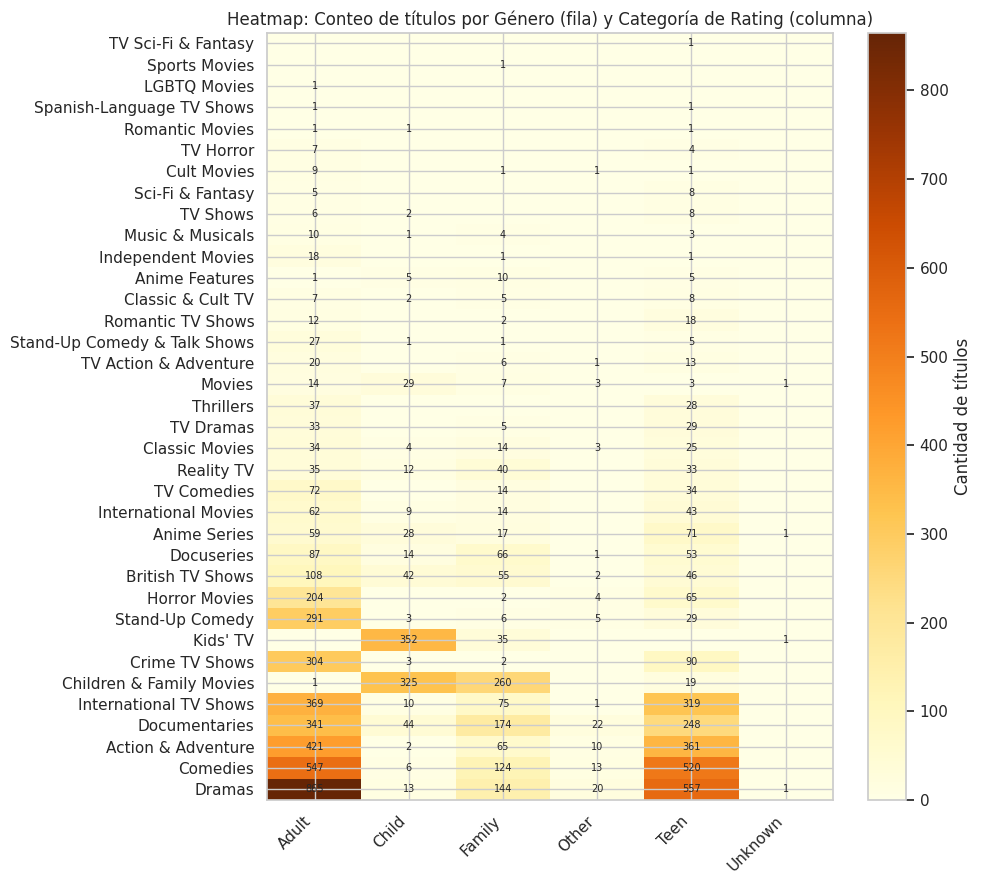

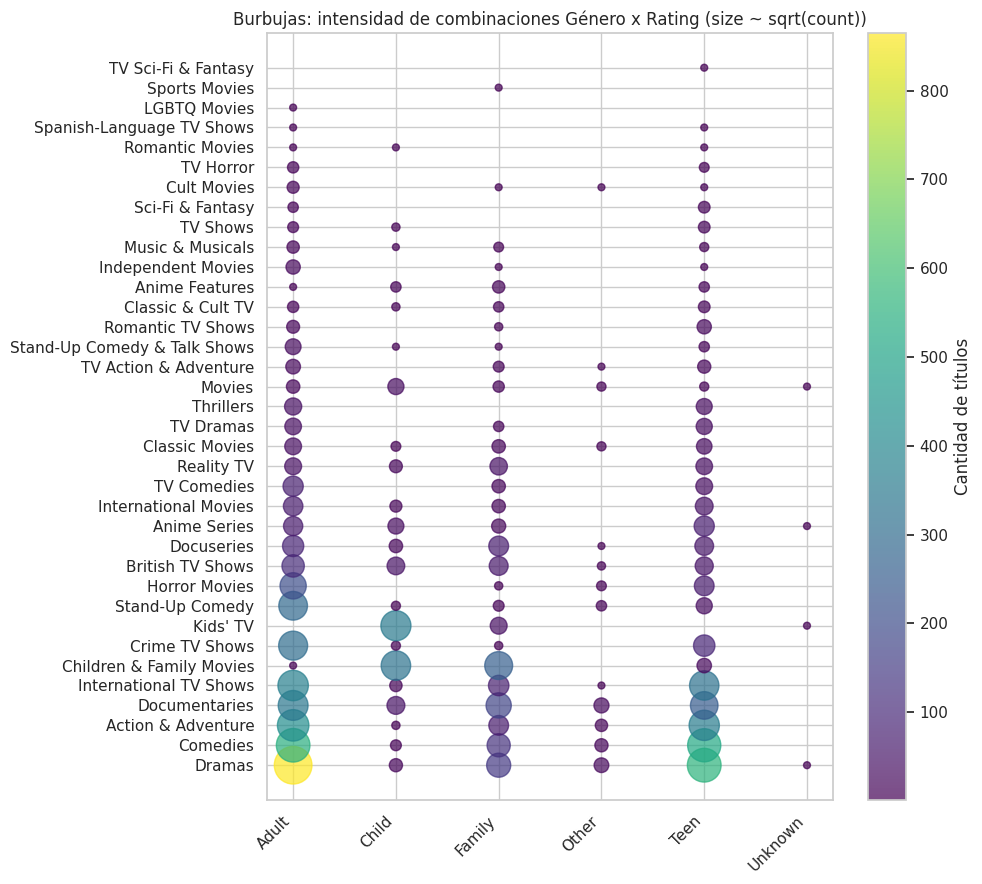


Géneros con mayor proporción de contenido Adult (porcentaje sobre su total de títulos):
  LGBTQ Movies: 100.0%
  Independent Movies: 90.0%
  Stand-Up Comedy: 87.1%
  Stand-Up Comedy & Talk Shows: 79.4%
  Crime TV Shows: 76.2%
  Cult Movies: 75.0%
  Horror Movies: 74.2%
  TV Horror: 63.6%
  TV Comedies: 60.0%
  Thrillers: 56.9%

Géneros con mayor proporción Child:
  Kids' TV: 90.7%
  Children & Family Movies: 53.7%
  Movies: 50.9%
  Romantic Movies: 33.3%
  Anime Features: 23.8%
  British TV Shows: 16.6%
  Anime Series: 15.9%
  TV Shows: 12.5%
  Reality TV: 10.0%
  Classic & Cult TV: 9.1%

Géneros con mayor proporción Family:
  Sports Movies: 100.0%
  Anime Features: 47.6%
  Children & Family Movies: 43.0%
  Reality TV: 33.3%
  Docuseries: 29.9%
  Classic & Cult TV: 22.7%
  Music & Musicals: 22.2%
  British TV Shows: 21.7%
  Documentaries: 21.0%
  Classic Movies: 17.5%


In [22]:
import calendar

if 'main_genre' not in df.columns:
    df['main_genre'] = df['listed_in'].fillna('').apply(lambda x: x.split(',')[0].strip() if x else np.nan)

df['rating_clean'] = df['rating'].fillna('Unknown').astype(str).str.strip()

def rating_category(r):
    r = str(r).upper()
    if r == 'UNKNOWN' or r == 'NAN' or r == 'NONE':
        return 'Unknown'
    if ('MA' in r) or ('R' in r and r.startswith('R')) or ('NC-17' in r) or ('18' in r):
        return 'Adult'
    if '14' in r or 'PG-13' in r or 'TV-14' in r:
        return 'Teen'
    if 'PG' in r or 'TV-PG' in r:
        return 'Family'
    if 'TV-Y' in r or 'TV-G' in r or r == 'G' or 'Y7' in r:
        return 'Child'
    return 'Other'

df['rating_cat'] = df['rating_clean'].apply(rating_category)

combo_df = df.dropna(subset=['main_genre']).copy()

pivot = combo_df.pivot_table(
    index='main_genre',
    columns='rating_cat',
    values='show_id',
    aggfunc='count',
    fill_value=0
)

pivot['total'] = pivot.sum(axis=1)
pivot = pivot.sort_values('total', ascending=False)
pivot_no_total = pivot.drop(columns='total')

combo_counts = pivot_no_total.stack().reset_index()
combo_counts.columns = ['main_genre','rating_cat','count']
combo_counts = combo_counts.sort_values('count', ascending=False)
print("Top 10 combinaciones género + rating (más frecuentes):")
print(combo_counts.head(10).to_string(index=False))

heat = pivot_no_total.copy()

fig, ax = plt.subplots(figsize=(10, max(6, 0.25*heat.shape[0])))
c = ax.imshow(heat.values, aspect='auto', cmap='YlOrBr', origin='lower')
ax.set_xticks(np.arange(heat.shape[1]))
ax.set_xticklabels(heat.columns, rotation=45, ha='right')
ax.set_yticks(np.arange(heat.shape[0]))
ax.set_yticklabels(heat.index)
ax.set_title('Heatmap: Conteo de títulos por Género (fila) y Categoría de Rating (columna)')
plt.colorbar(c, ax=ax, label='Cantidad de títulos')

for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        v = int(heat.values[i, j])
        if v > 0:
            ax.text(j, i, v, ha='center', va='center', fontsize=7)

plt.tight_layout()
plt.show()
genres = heat.index.tolist()
cats = heat.columns.tolist()
xs = []
ys = []
sizes = []
colors = []

for i, g in enumerate(genres):
    for j, cat in enumerate(cats):
        cnt = int(heat.loc[g, cat])
        if cnt == 0:
            continue
        xs.append(j)
        ys.append(i)
        sizes.append(np.sqrt(cnt) * 25)
        colors.append(cnt)

fig, ax = plt.subplots(figsize=(10, max(6, 0.25*len(genres))))
sc = ax.scatter(xs, ys, s=sizes, c=colors, cmap='viridis', alpha=0.7)
ax.set_xticks(np.arange(len(cats)))
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_yticks(np.arange(len(genres)))
ax.set_yticklabels(genres)
ax.set_title('Burbujas: intensidad de combinaciones Género x Rating (size ~ sqrt(count))')
plt.colorbar(sc, ax=ax, label='Cantidad de títulos')
plt.tight_layout()
plt.show()

prop_by_genre = pivot_no_total.div(pivot_no_total.sum(axis=1), axis=0).fillna(0)
adult_prop = prop_by_genre['Adult'] if 'Adult' in prop_by_genre.columns else pd.Series(0, index=prop_by_genre.index)
top_adult_genres = adult_prop.sort_values(ascending=False).head(10)
print("\nGéneros con mayor proporción de contenido Adult (porcentaje sobre su total de títulos):")
for g, p in top_adult_genres.items():
    print(f"  {g}: {p*100:.1f}%")

child_prop = prop_by_genre['Child'] if 'Child' in prop_by_genre.columns else pd.Series(0, index=prop_by_genre.index)
family_prop = prop_by_genre['Family'] if 'Family' in prop_by_genre.columns else pd.Series(0, index=prop_by_genre.index)
top_child_genres = child_prop.sort_values(ascending=False).head(10)
top_family_genres = family_prop.sort_values(ascending=False).head(10)

print("\nGéneros con mayor proporción Child:")
for g, p in top_child_genres.items():
    print(f"  {g}: {p*100:.1f}%")

print("\nGéneros con mayor proporción Family:")
for g, p in top_family_genres.items():
    print(f"  {g}: {p*100:.1f}%")
